In [20]:
import pandas as pd

data = pd.read_csv('Salary_Data.csv')

x = data["YearsExperience"]
y = data["Salary"]

實際上會有一條方程式叫做（y = w * x + b）可以用來表達模型預測值

In [21]:
w = 10
b = 0
# W以及b在這邊可以先隨機假設
y_pred = w*x + b
cost = (y - y_pred)**2
cost.sum() / len(x)

602.547878787879

In [22]:
def compute_cost(x, y, w, b):
    '''
    Parameters:
    x, y(data)
    w, b(random number)
    
    Returns:
    cost = (y - y_pred)**2
    cost = cost.sum() / len(x)
    '''
    y_pred = w*x + b
    cost = (y - y_pred)**2
    cost = cost.sum() / len(x)

    return cost
#在這邊先創建一個函數用來儲存平均損失值

compute_cost(x, y, 10, 10)

227.88121212121214

In [23]:
# b=0 w=-100~100 cost會是多少

costs = []
for w in range(-100, 101):
    cost = compute_cost(x, y, w, 0)
    costs.append(cost)
costs

[420951.08121212124,
 413557.2063636363,
 406228.88242424245,
 398966.1093939394,
 391768.8872727272,
 384637.21606060606,
 377571.0957575757,
 370570.52636363637,
 363635.5078787879,
 356766.0403030302,
 349962.12363636366,
 343223.7578787879,
 336550.94303030305,
 329943.6790909091,
 323401.966060606,
 316925.8039393939,
 310515.19272727263,
 304170.13242424245,
 297890.623030303,
 291676.6645454545,
 285528.25696969696,
 279445.40030303027,
 273428.0945454546,
 267476.33969696966,
 261590.1357575757,
 255769.48272727273,
 250014.38060606056,
 244324.82939393938,
 238700.82909090907,
 233142.3796969697,
 227649.4812121212,
 222222.13363636364,
 216860.33696969692,
 211564.0912121212,
 206333.39636363636,
 201168.25242424244,
 196068.6593939394,
 191034.61727272722,
 186066.12606060607,
 181163.18575757576,
 176325.79636363636,
 171553.95787878786,
 166847.67030303032,
 162206.93363636362,
 157631.7478787879,
 153122.113030303,
 148678.02909090905,
 144299.49606060603,
 139986.5139393

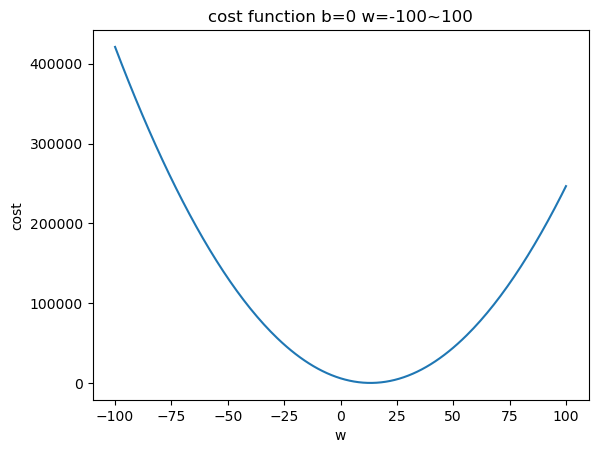

In [24]:
import matplotlib.pyplot as plt

#plt.scatter(range(-100, 101), costs)
plt.plot(range(-100, 101), costs)
plt.title("cost function b=0 w=-100~100")
plt.xlabel("w")
plt.ylabel("cost")
plt.show()

In [25]:
# w=-100~100 b=-100~100 的 cost
import numpy as np

ws = np.arange(-100, 101)
bs = np.arange(-100, 101)
costs = np.zeros((201, 201))
#用來創建一個裡面全部都是零的矩陣

i = 0
for w in ws:
    j = 0
    for b in bs:
        cost = compute_cost(x, y, w, b)
        costs[i, j] = cost
        j += 1
    i += 1

costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

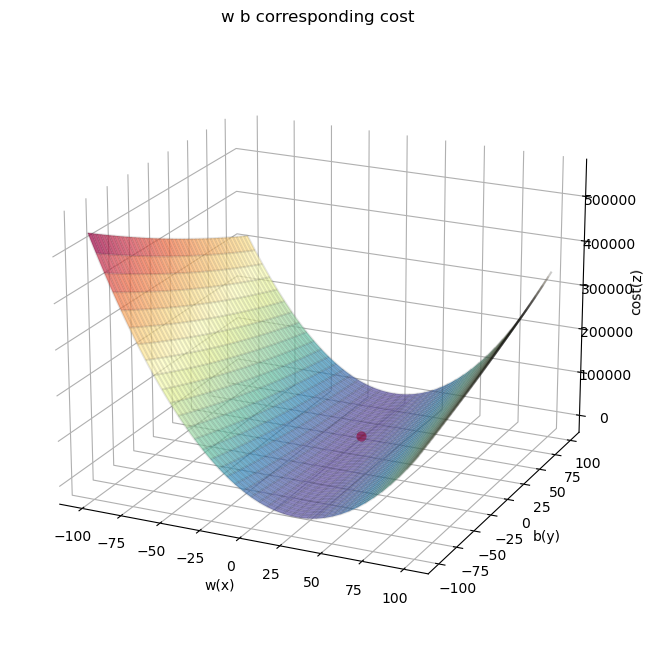

When w = [9], b = [29], there is the smallest cost: [32.69484848]


In [26]:

plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")
ax.view_init(20, -65)
ax.xaxis.set_pane_color((0, 0, 0, 0))
ax.yaxis.set_pane_color((0, 0, 0, 0))
ax.zaxis.set_pane_color((0, 0, 0, 0))

b_grid, w_grid = np.meshgrid(bs, ws)
#np.meshgrid()函數將bs, ws陣列作為輸入，並(返回兩個多維陣列(目的))b_grid和w_grid。b_grid陣列的每個元素都是bs陣列中的元素，而w_grid陣列的每個元素都是ws陣列中的元素。這樣就生成了一個2維的坐標網格，其中b_grid陣列對應水平軸，w_grid陣列對應垂直軸。

ax.plot_surface(w_grid, b_grid, costs, cmap="Spectral_r", alpha=0.7)
ax.plot_wireframe(w_grid, b_grid, costs, color="black", alpha=0.1)

ax.set_title("w b corresponding cost")
ax.set_xlabel("w(x)")
ax.set_ylabel("b(y)")
ax.set_zlabel("cost(z)")

w_index, b_index = np.where(costs == np.min(costs))
#上面的costs是一個矩陣，所以要用2個值來表示
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=40)

plt.show()

print(f"When w = {ws[w_index]}, b = {bs[b_index]}, there is the smallest cost: {costs[w_index, b_index]}")